In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Data preparation

In [2]:
X, y = make_regression(n_samples=100, n_features=1, bias=10.0, noise=10.0, random_state=2)
y = np.expand_dims(y, axis=1)

print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


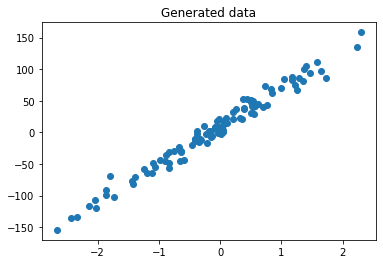

In [3]:
plt.scatter(X, y)
plt.title('Generated data')
plt.show()

### Data split

In [4]:
train_x = X[:80]
test_x = X[80:]

train_y = y[:80]
test_y = y[80:]

In [5]:
train_x.shape

(80, 1)

In [6]:
test_x.shape

(20, 1)

### Defining model

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='linear', input_shape=(1,)))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

### Training

In [10]:
model.fit(train_x, train_y, batch_size=10, epochs=100, shuffle=True)

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 3368.2355 - mse: 3368.2355
Epoch 2/100
8/8 [==============================] - 0s 778us/step - loss: 2384.1259 - mse: 2384.1259
Epoch 3/100
8/8 [==============================] - 0s 992us/step - loss: 1990.3206 - mse: 1990.3206
Epoch 4/100
8/8 [==============================] - 0s 803us/step - loss: 1453.2794 - mse: 1453.2794
Epoch 5/100
8/8 [==============================] - 0s 887us/step - loss: 1180.8498 - mse: 1180.8498
Epoch 6/100
8/8 [==============================] - 0s 820us/step - loss: 756.3903 - mse: 756.3903
Epoch 7/100
8/8 [==============================] - 0s 682us/step - loss: 592.8251 - mse: 592.8251
Epoch 8/100
8/8 [==============================] - 0s 714us/step - loss: 478.2413 - mse: 478.2414
Epoch 9/100
8/8 [==============================] - 0s 735us/step - loss: 375.6004 - mse: 375.6004
Epoch 10/100
8/8 [==============================] - 0s 752us/step - loss: 266.9683 - mse: 266.9683
Epoch 11/10

8/8 [==============================] - 0s 1ms/step - loss: 80.1959 - mse: 80.1959
Epoch 86/100
8/8 [==============================] - 0s 923us/step - loss: 90.1371 - mse: 90.1371
Epoch 87/100
8/8 [==============================] - 0s 959us/step - loss: 62.7856 - mse: 62.7856
Epoch 88/100
8/8 [==============================] - 0s 887us/step - loss: 90.8364 - mse: 90.8364
Epoch 89/100
8/8 [==============================] - 0s 912us/step - loss: 81.2015 - mse: 81.2015
Epoch 90/100
8/8 [==============================] - 0s 941us/step - loss: 75.3480 - mse: 75.3480
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 66.6220 - mse: 66.6220
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 83.4339 - mse: 83.4339
Epoch 93/100
8/8 [==============================] - 0s 932us/step - loss: 75.9794 - mse: 75.9794
Epoch 94/100
8/8 [==============================] - 0s 1ms/step - loss: 94.1552 - mse: 94.1552
Epoch 95/100
8/8 [==============================] -

### Test

In [11]:
y_pred = model.predict(test_x)

In [19]:
y_pred

array([[  40.575356 ],
       [  -4.985795 ],
       [ -55.0875   ],
       [  41.83931  ],
       [  16.071228 ],
       [  43.442204 ],
       [-109.124344 ],
       [  -7.6093845],
       [  80.24505  ],
       [  14.818714 ],
       [  84.56613  ],
       [ -59.20054  ],
       [  93.92009  ],
       [   1.6613989],
       [ 146.18454  ],
       [ -91.683    ],
       [-109.52902  ],
       [  56.40088  ],
       [  11.427103 ],
       [   1.8348618]], dtype=float32)

Text(0.5, 1.0, 'Model test')

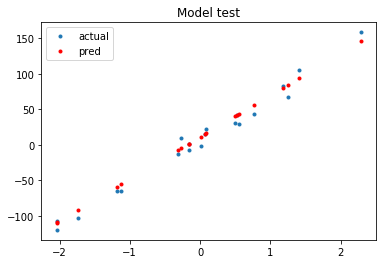

In [20]:
#plt.figure(dpi=150)
plt.plot(test_x, test_y,'.')
plt.plot(test_x, y_pred,'r.')
plt.legend(['actual', 'pred'])
plt.title('Model test')

### Weight / bias (advanced)

In [13]:
model.layers[0].get_weights()

[array([[59.02175]], dtype=float32), array([10.894417], dtype=float32)]

In [14]:
w1 = model.layers[0].get_weights()[0]
b1 = model.layers[0].get_weights()[1]

In [15]:
w1 = w1[0]
b1 = b1[0]

In [16]:
y_pred2 = test_x * w1 + b1

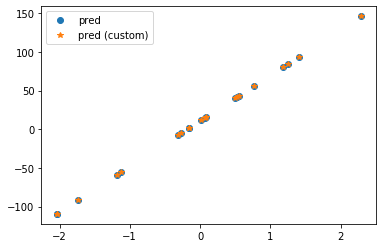

In [17]:
plt.plot(test_x, y_pred,'o')
plt.plot(test_x, y_pred2,'*')
plt.legend(['pred', 'pred (custom)'])

Text(0.5, 1.0, 'linear regression using keras')

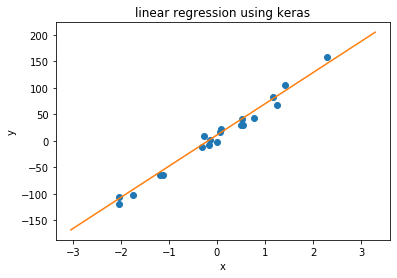

In [18]:
x1 = np.min(test_x)-1, np.max(test_x)+1
y1 = w1 * x1 + b1
#plt.figure(dpi=150)
plt.plot(test_x, test_y,'o')
plt.plot(x1, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('linear regression using keras')

# References

Simple Linear Regression with Tensorflow 2.0, https://ayoteralab.tistory.com/entry/Tensorflow-20-05-Simple-Linear-Regression-3 or https://archive.is/ya44R